# Investigating depth parameter of min_max strategy, with/without alpha-beta pruning
* Player 1 strategy min_max
* Player 2 strategy: max_score
* player 2 strategy is intelligent enough have a lose rate that is not 0, but will not also improve with depth
    * I.e., don't compare min_max vs min_max
* Allows us to compare how min_max improves with depth


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../data/time_min_max_vs_depth.csv')

In [2]:
depths = np.sort( data['depth'].unique() )
print(depths)

[0. 1. 2. 3. 4. 5. 6.]


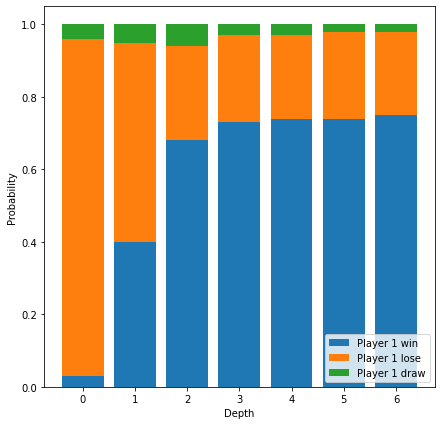

In [4]:
probs_depth = pd.DataFrame(columns=['win', 'lose', 'draw'], index=depths, dtype=float)

for depth in depths:
    view = data[ data['depth'] == depth ]
    norm = len(view)
    
    probs_depth['win'].loc[depth]  = len(view[ view['player_1_result'] == 'win' ]) / norm
    probs_depth['lose'].loc[depth] = len(view[ view['player_1_result'] == 'lose' ]) / norm
    probs_depth['draw'].loc[depth] = len(view[ view['player_1_result'] == 'draw' ]) / norm
    
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.bar(probs_depth.index, probs_depth['win'],  label='Player 1 win')
ax.bar(probs_depth.index, probs_depth['lose'], label='Player 1 lose', bottom=probs_depth['win'])
ax.bar(probs_depth.index, probs_depth['draw'], label='Player 1 draw', bottom=probs_depth['win']+probs_depth['lose'])

ax.set_xlabel('Depth')
ax.set_ylabel('Probability')

plt.legend(loc='best')

plt.show()